<a href="https://colab.research.google.com/github/MAKOMIKOLAKO/NASA-SEES-V-EX-WG2/blob/main/V_EX_Group_2_ML_Notebook_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Random Forest Model Training**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Loading in all the modules we'll need for the project - both to train the model and display the data / results for conclusion and evaluation.

References: https://colab.research.google.com/github/NASAARSET/ARSET_ML_Fundamentals/blob/main/session2/2_MODIS_Train_Eval_Session2.ipynb

https://colab.research.google.com/github/NASAARSET/ARSET_ML_Fundamentals/blob/main/session2/2_MODIS_Train_Eval_Session2.ipynb

Found on the [NASA ARSET Machine Learning Fundamentals Github](https://github.com/NASAARSET/ARSET_ML_Fundamentals)

In [2]:
# Install packages
!pip install scikit-optimize

# Data Processing
import pandas as pd
import numpy as np
import imageio.v3 as iio
import skimage as ski
import os


# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split, KFold, cross_val_score
from scipy.stats import randint
from numpy import loadtxt, sqrt, mean
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer
from skopt import BayesSearchCV

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.6 MB/s eta 0:00:00


### Loading in our data


In [1]:
current_directory = os.getcwd()
print("Current working directory:", current_directory)

model1_datasetname = 'trainingdata_latlongonly.csv' # Latitude and longitude (coordinates) only
model2_datasetname = 'training1.csv' #  Coordinates and GLOBE data
model3_datasetname = 'training5.csv' # Coordinates, GLOBE data, and CEO data
model4_datasetname = 'training6.csv' # Coordinates and CEO data only (for testing)


#dataset = loadtxt('dataset_name, delimiter=",", skiprows=1)  # Assume header
#lat_long_only_dataset = loadtxt(latlongonly_dataset_name, delimiter=",", skiprows=1)  # Assume header

# Load the dataset using pandas which handles missing values and mixed data types better
model4_dataset = pd.read_csv(model4_datasetname, delimiter=",").values  # Assumes header is in the first row by default
model3_dataset = pd.read_csv(model3_datasetname, delimiter=",").values  # Assumes header is in the first row by default
model2_dataset = pd.read_csv(model2_datasetname, delimiter=",").values  # Assumes header is in the first row by default
model1_dataset = pd.read_csv(model1_datasetname, delimiter=",").values  # Assumes header is in the first row by default


NameError: name 'os' is not defined

## Visualizing the data

In [7]:
df_pandas = pd.read_csv(model3_datasetname)
df_pandas2 = pd.read_csv(model1_datasetname)

df_pandas.info()
df_pandas2.info()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dataset' is a pandas DataFrame
# Replace 'dataset' with the actual name of your DataFrame variable
# sns.pairplot(df_pandas[['red_channel_peak', 'green_channel_peak', 'blue_channel_peak', 'LST']])
#plt.show()

# Correlation matrix
#correlation_matrix = df_pandas[['red_channel_peak', 'green_channel_peak', 'blue_channel_peak', 'LST']].corr()
#print(correlation_matrix)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 25 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   image_id                                              437 non-null    int64  
 1   latitude                                              437 non-null    float64
 2   longitude                                             437 non-null    float64
 3   Impervious Surface                                    437 non-null    float64
 4   Grass                                                 437 non-null    float64
 5   Dead Vegetation                                       437 non-null    float64
 6   Bare Ground                                           437 non-null    float64
 7   Cultivated Vegetation                                 437 non-null    float64
 8   Bush / Scrub                                          437 no

### Defining our model and starting training (Model 3)

In [2]:
## VEGETATION DATA

# Setup imputer to replace NaN values with the mean of each column
# (added this for the dataset that included CEO points, as many of the values were blank)
imputer = SimpleImputer(strategy='mean')
df_pandas.iloc[:, 1:26] = imputer.fit_transform(df_pandas.iloc[:, 1:26])  # Assuming your features are from column 1 to 10

dataset = df_pandas.values

# Define features and target
X = dataset[:, 1:24] #skipping column 0 because it's just image id - change these values if using a dataset with a different # of columns
y = dataset[:, 24]

# Split data
seed = 42
test_size = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)  # Calculating R-squared

print("Mean Squared Error: %.2f" % mse)
print("Root Mean Squared Error: %.2f" % rmse)
print("R-squared: %.2f" % r2)

# Feature importances
feature_importances = model.feature_importances_
features =[
                    'Latitude', 'Longitude', 'Impervious Surface', 'Grass', 'Dead Vegetation', 'Bare Ground',
                    'Cultivated Vegetation', 'Bush/Scrub', 'Water (river)', 'Water (lake)', 'Confidence', 'Total securewatch dates',
                    'Water (irrigation ditch)', 'Grass', 'Water (rivers/stream)',
                    'Impervious Surface (no building)', 'Wetlands', 'Water (lake/ponded/container)',
                    'Cultivated Vegetation', 'Bare Ground', 'Building', 'Trees -Canopy Cover',
                    'Unknown', 'Bush/Scrub', 'Shadow'
                ],
print("Feature Importances:")
for feature, importance in zip(features, feature_importances):
    print(f"{feature}: {importance:.4f}")

# Actual vs Predicted
for actual, predicted in zip(y_test, y_pred):
    print(f"Actual: {actual}, Predicted: {predicted:.2f}")

NameError: name 'SimpleImputer' is not defined

In [10]:
## VEGETATION DATA - K-FOLD CROSS VALIDATION

kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize measures
scores_r2 = []
scores_mse = []
scores_rmse = []
scores_mae = []
feature_importances = []


# K-Fold Cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluation
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Storing results
    scores_r2.append(r2)
    scores_mse.append(mse)
    scores_rmse.append(rmse)
    scores_mae.append(mae)

    feature_importances.append(model.feature_importances_)

mean_feature_importances = mean(feature_importances, axis=0)

# Print average scores
print("Average R-squared: %.2f" % np.mean(scores_r2))
print("Average Mean Squared Error: %.2f" % np.mean(scores_mse))
print("Average Root Mean Squared Error: %.2f" % np.mean(scores_rmse))
print("Average Mean Absolute Error: %.2f" % np.mean(scores_mae))

# Display feature importances
print("Feature Importances:")
for idx, imp in enumerate(mean_feature_importances):
    print(f"Feature {idx + 1}: {imp:.4f}")

Average R-squared: 0.82
Average Mean Squared Error: 7.14
Average Root Mean Squared Error: 2.65
Average Mean Absolute Error: 1.99
Feature Importances:
Feature 1: 0.6219
Feature 2: 0.1335
Feature 3: 0.0714
Feature 4: 0.0136
Feature 5: 0.0110
Feature 6: 0.0136
Feature 7: 0.0011
Feature 8: 0.0046
Feature 9: 0.0000
Feature 10: 0.0000
Feature 11: 0.0016
Feature 12: 0.0084
Feature 13: 0.0013
Feature 14: 0.0405
Feature 15: 0.0000
Feature 16: 0.0013
Feature 17: 0.0008
Feature 18: 0.0033
Feature 19: 0.0093
Feature 20: 0.0510
Feature 21: 0.0031
Feature 22: 0.0026
Feature 23: 0.0064


## Bayesian Optimization

In [11]:
# Bayesian Optimization

param_space = {
    'n_estimators': (10, 1000),  # Number of trees in the forest
    'max_depth': (3, 50),  # Maximum depth of each tree
    'min_samples_split': (2, 10),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': (1, 10),  # Minimum number of samples required to be at a leaf node
    'max_features': ('sqrt', 'log2')  # The number of features to consider when looking for the best split
}

bayes_search = BayesSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    search_spaces=param_space,
    n_iter=100,
    cv=10,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

bayes_search.fit(X_train, y_train)

print(f"Best parameters found: {bayes_search.best_params_}")

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits


KeyboardInterrupt: 

In [ ]:
# testing again based on these best params:

# Best parameters found by BayesSearchCV
best_params = bayes_search.best_params_

# Initialize RandomForestRegressor with the best parameters

optimized_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42
)

# Setup K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Calculate RMSE for each cross-validated fold using 'neg_root_mean_squared_error' which returns negative values
rmse_scores = cross_val_score(optimized_model, X, y, scoring='neg_root_mean_squared_error', cv=kf, n_jobs=-1)

# Convert scores to positive
rmse_scores = -rmse_scores

# Calculate average RMSE
average_rmse = np.mean(rmse_scores)

# Calculate R-squared for each fold
r2_scores = cross_val_score(optimized_model, X, y, scoring='r2', cv=kf, n_jobs=-1)

# Calculate average R-squared
average_r2 = np.mean(r2_scores)

# Calculate MAE for each fold using 'neg_mean_absolute_error' which returns negative values
mae_scores = cross_val_score(optimized_model, X, y, scoring='neg_mean_absolute_error', cv=kf, n_jobs=-1)

# Convert scores to positive
mae_scores = -mae_scores

# Calculate average MAE#
average_mae = np.mean(mae_scores)

# Print the evaluation metrics
print(f"Average Root Mean Squared Error from K-Fold CV: {average_rmse:.2f}")
print(f"Average R-squared from K-Fold CV: {average_r2:.2f}")
print(f"Average Mean Absolute Error from K-Fold CV: {average_mae:.2f}")

Average Root Mean Squared Error from K-Fold CV: 2.95
Average R-squared from K-Fold CV: 0.79
Average Mean Absolute Error from K-Fold CV: 2.26


### Visualizing Vegetation Incorporated Model

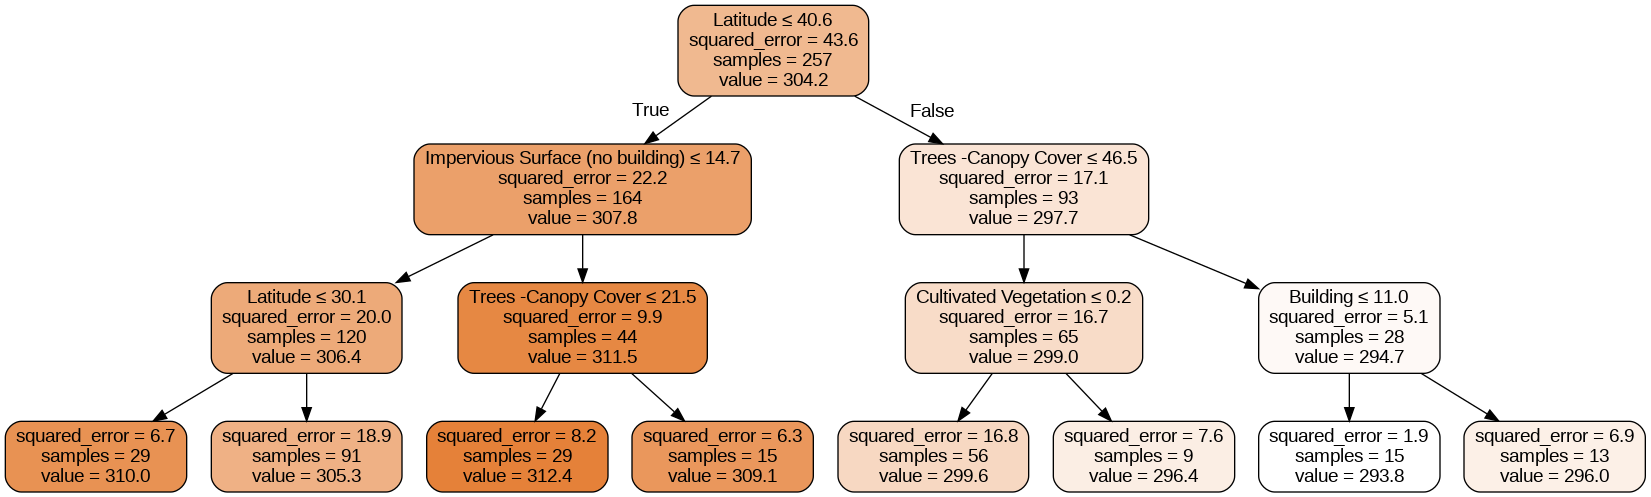

In [ ]:
tree = model.estimators_[0]
export_graphviz(tree, out_file='tree.dot', feature_names=[
                    'Latitude', 'Longitude', 'Impervious Surface', 'Grass', 'Dead Vegetation', 'Bare Ground',
                    'Cultivated Vegetation', 'Bush/Scrub', 'Water (river)', 'Water (lake)', 'Confidence', 'Total securewatch dates',
                    'Water (irrigation ditch)', 'Grass', 'Water (rivers/stream)',
                    'Impervious Surface (no building)', 'Wetlands', 'Water (lake/ponded/container)',
                    'Cultivated Vegetation', 'Bare Ground', 'Building', 'Trees -Canopy Cover',
                    'Unknown', 'Bush/Scrub', 'Shadow'
                ],
                filled = True, rounded = True, special_characters = True, precision = 1)

with open("tree.dot") as z:
  dot_graph = z.read()
graph = graphviz.Source(dot_graph) # Graphviz exports .dot file automatically so have to convert to png
graph.render("tree", format="png") # Have to convert to png to be able to visualize

# Display image
Image(filename='tree.png') # Stop here if you want to visualize the one full decision tree (going to be really large though)

# Visualizing Small/Reduced Tree and Depth Size
model_small = RandomForestRegressor(n_estimators=10, max_depth = 3) # Limit depth to 3 levels
model_small.fit(X_train, y_train)

# Extract the small tree
tree_small = model_small.estimators_[0]

export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names=[
                    'Latitude', 'Longitude', 'Impervious Surface', 'Grass', 'Dead Vegetation', 'Bare Ground',
                    'Cultivated Vegetation', 'Bush/Scrub', 'Water (river)', 'Water (lake)', 'Confidence', 'Total securewatch dates',
                    'Water (irrigation ditch)', 'Grass', 'Water (rivers/stream)',
                    'Impervious Surface (no building)', 'Wetlands', 'Water (lake/ponded/container)',
                    'Cultivated Vegetation', 'Bare Ground', 'Building', 'Trees -Canopy Cover',
                    'Unknown', 'Bush/Scrub', 'Shadow'
                ],
                filled = True, rounded = True, special_characters = True, precision = 1)

with open("small_tree.dot") as k:
  dot_graph2 = k.read()

graph = graphviz.Source(dot_graph2)
graph.render("small_tree", format="png")

# Display image
Image(filename='small_tree.png')

In [ ]:
def calculate_calibration_data(predictions, actuals, n_bins=10):
    bins = np.histogram_bin_edges(predictions, bins=n_bins)
    bin_indices = np.digitize(predictions, bins) - 1  # subtract 1 to make indices zero-based

    bin_means_pred = []
    bin_means_actual = []

    for i in range(n_bins):
        bin_mask = (bin_indices == i)
        if np.any(bin_mask):
            bin_means_pred.append(predictions[bin_mask].mean())
            bin_means_actual.append(actuals[bin_mask].mean())

    return np.array(bin_means_pred), np.array(bin_means_actual)

# Calculate calibration data
bin_means_pred, bin_means_actual = calculate_calibration_data(model_predict, y_test)

# Plot calibration curve
plt.figure(figsize=(10, 6))
plt.plot(bin_means_pred, bin_means_actual, marker='o', label='XGBoost')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', label='Perfect Calibration')
plt.xlabel('Mean Predicted Value')
plt.ylabel('Mean Actual Value')
plt.title('Calibration Plot')
plt.legend()
plt.show()

NameError: name 'model_predict' is not defined

# Latitude/Longitude Only (Baseline) Model

In [ ]:
## LAT LONG ONLY DATA

# Define features and target
X = lat_long_only_dataset[:, 1:3] #skipping column 0 because it's just image id
y = lat_long_only_dataset[:, 3]

# Split data
seed = 42
test_size = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)  # Calculating R-squared

print("Mean Squared Error: %.2f" % mse)
print("Root Mean Squared Error: %.2f" % rmse)
print("R-squared: %.2f" % r2)

# Feature importances
feature_importances = model.feature_importances_
features = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6']  # Adjust these as per your dataset

print("Feature Importances:")
for feature, importance in zip(features, feature_importances):
    print(f"{feature}: {importance:.4f}")

# Actual vs Predicted
for actual, predicted in zip(y_test, y_pred):
    print(f"Actual: {actual}, Predicted: {predicted:.2f}")


Mean Squared Error: 6.11
Root Mean Squared Error: 2.47
R-squared: 0.88
Feature Importances:
Feature1: 0.7913
Feature2: 0.2087
Actual: 304.8505834, Predicted: 305.78
Actual: 294.1459134, Predicted: 294.33
Actual: 294.7608385, Predicted: 294.16
Actual: 304.6922967, Predicted: 307.11
Actual: 299.9744641, Predicted: 298.37
Actual: 303.6639335, Predicted: 306.77
Actual: 312.1187233, Predicted: 312.90
Actual: 304.2278697, Predicted: 304.78
Actual: 315.5122767, Predicted: 313.55
Actual: 297.0496707, Predicted: 298.95
Actual: 315.3055734, Predicted: 311.06
Actual: 311.9201095, Predicted: 312.10
Actual: 297.0387821, Predicted: 298.99
Actual: 314.1086589, Predicted: 312.80
Actual: 307.4823784, Predicted: 304.93
Actual: 311.1221395, Predicted: 311.19
Actual: 296.7035579, Predicted: 296.94
Actual: 297.5722879, Predicted: 299.07
Actual: 301.372916, Predicted: 301.37
Actual: 290.1052812, Predicted: 294.79
Actual: 311.6559238, Predicted: 309.25
Actual: 297.190896, Predicted: 297.19
Actual: 307.483489

### Using K-fold cross validation to evaluate the model's performance

In [ ]:
## LAT LONG ONLY DATA

kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize measures
scores_r2 = []
scores_mse = []
scores_rmse = []
scores_mae = []
feature_importances = []


# K-Fold Cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluation
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Storing results
    scores_r2.append(r2)
    scores_mse.append(mse)
    scores_rmse.append(rmse)
    scores_mae.append(mae)

    feature_importances.append(model.feature_importances_)

mean_feature_importances = mean(feature_importances, axis=0)

# Print average scores
print("Average R-squared: %.2f" % np.mean(scores_r2))
print("Average Mean Squared Error: %.2f" % np.mean(scores_mse))
print("Average Root Mean Squared Error: %.2f" % np.mean(scores_rmse))
print("Average Mean Absolute Error: %.2f" % np.mean(scores_mae))

# Display feature importances
print("Feature Importances:")
for idx, imp in enumerate(mean_feature_importances):
    print(f"Feature {idx + 1}: {imp:.4f}")

Average R-squared: 0.84
Average Mean Squared Error: 6.43
Average Root Mean Squared Error: 2.51
Average Mean Absolute Error: 1.89
Feature Importances:
Feature 1: 0.7843
Feature 2: 0.2157


## Bayesian Optimization

In [ ]:
# Bayesian Optimization

param_space = {
    'n_estimators': (10, 1000),  # Number of trees in the forest
    'max_depth': (3, 50),  # Maximum depth of each tree
    'min_samples_split': (2, 10),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': (1, 10),  # Minimum number of samples required to be at a leaf node
    'max_features': ('sqrt', 'log2')  # The number of features to consider when looking for the best split
}

bayes_search = BayesSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    search_spaces=param_space,
    n_iter=100,
    cv=10,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

bayes_search.fit(X_train, y_train)

print(f"Best parameters found: {bayes_search.best_params_}")

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

In [ ]:
# Testing again based on these best params:

# Best parameters found by BayesSearchCV
best_params = bayes_search.best_params_

# Initialize RandomForestRegressor with the best parameters

optimized_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42
)

# Setup K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Calculate RMSE for each cross-validated fold using 'neg_root_mean_squared_error' which returns negative values
rmse_scores = cross_val_score(optimized_model, X, y, scoring='neg_root_mean_squared_error', cv=kf, n_jobs=-1)

# Convert scores to positive
rmse_scores = -rmse_scores

# Calculate average RMSE
average_rmse = np.mean(rmse_scores)

# Calculate R-squared for each fold
r2_scores = cross_val_score(optimized_model, X, y, scoring='r2', cv=kf, n_jobs=-1)

# Calculate average R-squared
average_r2 = np.mean(r2_scores)

# Calculate MAE for each fold using 'neg_mean_absolute_error' which returns negative values
mae_scores = cross_val_score(optimized_model, X, y, scoring='neg_mean_absolute_error', cv=kf, n_jobs=-1)

# Convert scores to positive
mae_scores = -mae_scores

# Calculate average MAE#
average_mae = np.mean(mae_scores)

# Print the evaluation metrics
print(f"Average Root Mean Squared Error from K-Fold CV: {average_rmse:.2f}")
print(f"Average R-squared from K-Fold CV: {average_r2:.2f}")
print(f"Average Mean Absolute Error from K-Fold CV: {average_mae:.2f}")

Average Root Mean Squared Error from K-Fold CV: 2.59
Average R-squared from K-Fold CV: 0.83
Average Mean Absolute Error from K-Fold CV: 1.99


### Visualizing Lat Long Only Model

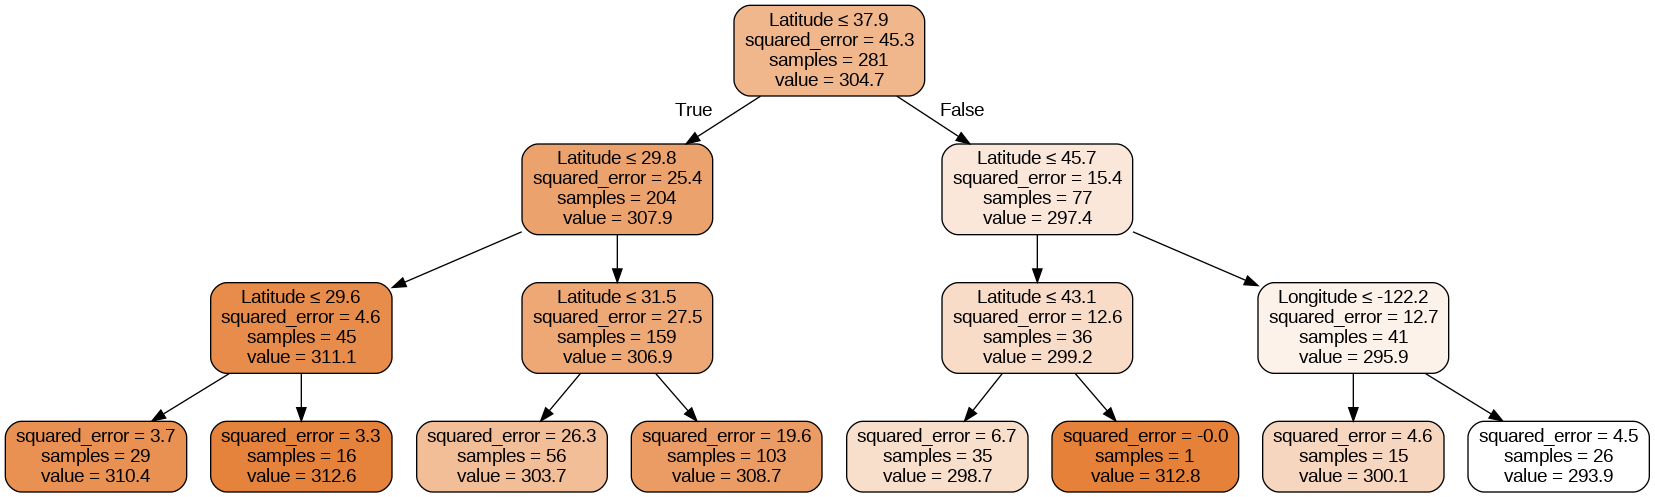

In [ ]:
tree = model.estimators_[0]
export_graphviz(tree, out_file='tree.dot', feature_names=['Latitude', 'Longitude'], # If I add more features, it gives me an error
                filled = True, rounded = True,
                special_characters = True, precision = 1)

with open("tree.dot") as z:
  dot_graph = z.read()
graph = graphviz.Source(dot_graph) # Graphviz exports .dot file automatically so have to convert to png
graph.render("tree", format="png") # Have to convert to png to be able to visualize

# Display image
Image(filename='tree.png') # Stop here if you want to visualize the one full decision tree (going to be really large though)

# Visualizing Small/Reduced Tree and Depth Size
model_small = RandomForestRegressor(n_estimators=10, max_depth = 3) # Limit depth to 3 levels
model_small.fit(X_train, y_train)

# Extract the small tree
tree_small = model_small.estimators_[0]

export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = ['Latitude', 'Longitude'],
                filled = True, rounded = True, special_characters = True, precision = 1)

with open("small_tree.dot") as k:
  dot_graph2 = k.read()
graph = graphviz.Source(dot_graph2)
graph.render("small_tree", format="png")

# Display image
Image(filename='small_tree.png')

# Model 2 (coordinates and GLOBE data only)

In [ ]:
## MODEL 2

# Define features and target
X = model2_dataset[:, 1:11] #skipping column 0 because it's just image id
y = model2_dataset[:, 11]

# Split data
seed = 42
test_size = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)  # Calculating R-squared

print("Mean Squared Error: %.2f" % mse)
print("Root Mean Squared Error: %.2f" % rmse)
print("R-squared: %.2f" % r2)

# Feature importances
feature_importances = model.feature_importances_
features = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6']  # Adjust these as per your dataset

print("Feature Importances:")
for feature, importance in zip(features, feature_importances):
    print(f"{feature}: {importance:.4f}")

# Actual vs Predicted
for actual, predicted in zip(y_test, y_pred):
    print(f"Actual: {actual}, Predicted: {predicted:.2f}")


Mean Squared Error: 7.88
Root Mean Squared Error: 2.81
R-squared: 0.84
Feature Importances:
Feature1: 0.6719
Feature2: 0.1937
Feature3: 0.0822
Feature4: 0.0181
Feature5: 0.0114
Feature6: 0.0131
Actual: 308.7866387, Predicted: 305.88
Actual: 294.32293, Predicted: 294.42
Actual: 312.8407381, Predicted: 311.77
Actual: 311.1318554, Predicted: 311.70
Actual: 311.7121603, Predicted: 311.18
Actual: 310.7992755, Predicted: 311.11
Actual: 313.1706205, Predicted: 309.84
Actual: 298.1563948, Predicted: 295.73
Actual: 307.1554833, Predicted: 303.62
Actual: 308.2024259, Predicted: 304.00
Actual: 313.3791193, Predicted: 307.11
Actual: 296.3145114, Predicted: 293.63
Actual: 302.4363531, Predicted: 303.69
Actual: 305.3104376, Predicted: 306.01
Actual: 303.6751885, Predicted: 305.51
Actual: 296.7035579, Predicted: 296.73
Actual: 306.8793402, Predicted: 306.39
Actual: 294.0096728, Predicted: 296.11
Actual: 296.7509665, Predicted: 296.23
Actual: 304.8907746, Predicted: 308.07
Actual: 308.1267398, Predict

In [ ]:
## MODEL 2 K-FOLD

kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize measures
scores_r2 = []
scores_mse = []
scores_rmse = []
scores_mae = []
feature_importances = []


# K-Fold Cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluation
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Storing results
    scores_r2.append(r2)
    scores_mse.append(mse)
    scores_rmse.append(rmse)
    scores_mae.append(mae)

    feature_importances.append(model.feature_importances_)

mean_feature_importances = mean(feature_importances, axis=0)

# Print average scores
print("Average R-squared: %.2f" % np.mean(scores_r2))
print("Average Mean Squared Error: %.2f" % np.mean(scores_mse))
print("Average Root Mean Squared Error: %.2f" % np.mean(scores_rmse))
print("Average Mean Absolute Error: %.2f" % np.mean(scores_mae))

# Display feature importances
print("Feature Importances:")
for idx, imp in enumerate(mean_feature_importances):
    print(f"Feature {idx + 1}: {imp:.4f}")

Average R-squared: 0.82
Average Mean Squared Error: 7.28
Average Root Mean Squared Error: 2.68
Average Mean Absolute Error: 2.02
Feature Importances:
Feature 1: 0.6203
Feature 2: 0.1346
Feature 3: 0.0708
Feature 4: 0.0130
Feature 5: 0.0114
Feature 6: 0.0143
Feature 7: 0.0012
Feature 8: 0.0047
Feature 9: 0.0000
Feature 10: 0.0000
Feature 11: 0.0069
Feature 12: 0.0000
Feature 13: 0.0014
Feature 14: 0.0078
Feature 15: 0.0009
Feature 16: 0.0370
Feature 17: 0.0000
Feature 18: 0.0010
Feature 19: 0.0008
Feature 20: 0.0034
Feature 21: 0.0092
Feature 22: 0.0511
Feature 23: 0.0020
Feature 24: 0.0023
Feature 25: 0.0061


In [ ]:
# Bayesian Optimization

param_space = {
    'n_estimators': (10, 1000),  # Number of trees in the forest
    'max_depth': (3, 50),  # Maximum depth of each tree
    'min_samples_split': (2, 10),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': (1, 10),  # Minimum number of samples required to be at a leaf node
    'max_features': ('sqrt', 'log2')  # The number of features to consider when looking for the best split
}

bayes_search = BayesSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    search_spaces=param_space,
    n_iter=100,
    cv=10,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

bayes_search.fit(X_train, y_train)

print(f"Best parameters found: {bayes_search.best_params_}")

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

In [ ]:
# testing again based on these best params:

# Best parameters found by BayesSearchCV
best_params = bayes_search.best_params_

# Initialize RandomForestRegressor with the best parameters

optimized_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42
)

# Setup K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Calculate RMSE for each cross-validated fold using 'neg_root_mean_squared_error' which returns negative values
rmse_scores = cross_val_score(optimized_model, X, y, scoring='neg_root_mean_squared_error', cv=kf, n_jobs=-1)

# Convert scores to positive
rmse_scores = -rmse_scores

# Calculate average RMSE
average_rmse = np.mean(rmse_scores)

# Calculate R-squared for each fold
r2_scores = cross_val_score(optimized_model, X, y, scoring='r2', cv=kf, n_jobs=-1)

# Calculate average R-squared
average_r2 = np.mean(r2_scores)

# Calculate MAE for each fold using 'neg_mean_absolute_error' which returns negative values
mae_scores = cross_val_score(optimized_model, X, y, scoring='neg_mean_absolute_error', cv=kf, n_jobs=-1)

# Convert scores to positive
mae_scores = -mae_scores

# Calculate average MAE#
average_mae = np.mean(mae_scores)

# Print the evaluation metrics
print(f"Average Root Mean Squared Error from K-Fold CV: {average_rmse:.2f}")
print(f"Average R-squared from K-Fold CV: {average_r2:.2f}")
print(f"Average Mean Absolute Error from K-Fold CV: {average_mae:.2f}")

NameError: name 'bayes_search' is not defined